## CONSUMO DE CERVEJA - SÃO PAULO

#### Introdução

A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Ela é perfeita para quase todas as situações, desde happy hour até grandes festas de casamento. Se você pensar bem, já deu vontade de tomar uma cerveja não é mesmo? Bom, você não está sozinho.

O objetivo deste trabalho será demonstrar os impactos das variáveis sobre o consumo de cerveja em uma determinada região e a previsão de consumo para determinados cenários. Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (média).

Você pode obter mais informações sobre o dataset no site do kaggle: [Beer Consumption - Sao Paulo](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)

In [37]:
# Importando as bibliotecas

import requests
import json
import datetime


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'plotly'

In [ ]:
URL = 'https://api.openweathermap.org/data/2.5/onecall?lat=-23.5489&lon=-46.6388&exclude=hourly,current,minutely,alerts&units=metric&appid=6f14efc1f8a62b702f3104dc08bd0b36'

In [ ]:
data = requests.get(URL).content

In [ ]:
data_js = json.loads(data)
type(data_js)

In [ ]:
data_js

In [ ]:
data_js['daily'][0]['temp']['max']

In [ ]:
time_pred = {'max':[],'min':[],'pop':[],'data':[]}

In [ ]:
for i in range(7):
    time_pred['max'].append(data_js['daily'][i]['temp']['max'])
    time_pred['min'].append(data_js['daily'][i]['temp']['min'])
    time_pred['pop'].append(data_js['daily'][i]['pop'])
    time_pred['data'].append(((date.today() + timedelta(days=i)).strftime(format='%Y/%m/%d')))

In [ ]:
time_pred

In [ ]:
df_json = pd.DataFrame(time_pred)

In [ ]:
df_json

In [2]:
# Importando o dataset em CSV

df = pd.read_csv('Consumo_cerveja.csv')
print(df.shape)
df.head(10)

(941, 7)


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


### Carregando Dataset com os dias que contém feriados

In [4]:
feriados = pd.read_csv('feriados_sao_paulo_2015.csv', sep=',')
feriados['Dia'] = pd.to_datetime(feriados['Dia'])
feriados

,Dia,Feriado
0,2015-01-01,Ano Novo
1,2015-01-25,Aniversário da Cidade
2,2015-02-16,Carnaval
3,2015-02-17,Carnaval
4,2015-02-18,Carnaval
5,2015-04-03,Sexta-Feira Santa
6,2015-04-03,Sexta-feira Santa
7,2015-04-21,Dia de Tiradentes
8,2015-05-01,Dia do Trabalho
9,2015-06-04,Corpus Christi


### Limpeza dos dados

In [5]:
# Somando a quantidade de valores NaN

df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
# Retirando os valores NaN do dataset

df.dropna(inplace=True)
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [7]:
# Observando as informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


### Preparação dos dados

In [12]:
# Final de semana de float para inteiro
df['Final de Semana'] = df['Final de Semana'].astype(int)

# Unidade de milhar removida do consumo e transformação para float
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.').astype('float64')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',', '.').astype('float64')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',', '.').astype('float64')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',', '.').astype('float64')

# Data de string para datetime
df['Data'] = pd.to_datetime(df['Data'])

df

AttributeError: Can only use .str accessor with string values!

In [13]:
# Usando o método info para confirmar a conversão do tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    int32         
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB



### Criando novas colunas

In [27]:
# Criação da coluna do mês
df['Mes'] = df['Data'].dt.month
df['Mes'] = df['Mes'].map({1:'Janeiro',2:'Fevereiro',3:'Março',4:'Abril',5:'Maio',6:'Junho',7:'Julho',8:'Agosto',9:'Setembro',
                           10:'Outubro',11:'Novembro',12:'Dezembro'})

# Criação da coluna de dia da semana

df['Dia da Semana'] = df['Data'].dt.dayofweek
df['Dia da Semana'] = df['Dia da Semana'].map({0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'})

# Identificação das observações que foram em feriados
df['Feriado'] = [dia in list(feriados['Dia']) for dia in df['Data']]

# Definição de dia útil ou não
df['Dia util'] = ~(df['Final de Semana'] | df['Feriado'])

# Conversão de bool para inteiro para as novas colunas: feriado e dia útil
df['Feriado'] = df['Feriado'].astype(int)
df['Dia util'] = df['Dia util'].astype(int)

df.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana,Feriado,Dia util,Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,Qui,1,0,Janeiro
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,Sex,0,1,Janeiro
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,Sab,0,0,Janeiro
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,Dom,0,0,Janeiro
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,Seg,0,1,Janeiro


In [29]:
# Aplicando o método descibe para ver as descrições

df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Temperatura Media (C),365.0,21.23,3.18,12.90,19.02,21.38,23.28,28.86
Temperatura Minima (C),365.0,17.46,2.83,10.60,15.30,17.90,19.60,24.50
Temperatura Maxima (C),365.0,26.61,4.32,14.50,23.80,26.90,29.40,36.50
Precipitacao (mm),365.0,5.20,12.42,0.00,0.00,0.00,3.20,94.80
Final de Semana,365.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
Consumo de cerveja (litros),365.0,25.40,4.40,14.34,22.01,24.87,28.63,37.94
Feriado,365.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00
Dia util,365.0,0.67,0.47,0.00,0.00,1.00,1.00,1.00


### Visualizando o dataset

Perguntas a serem respondidas:

1 - A temperatura média influencia no consumo?

2 - Se consome mais cerveja em dias de semana ou aos finais de semana?

3 - Qual mês que mais se comsonem cerveja?

In [36]:
trace = go.Pie(labels=df['Final de Semana'],
               values=df['Consumo de cerveja (litros)'])

data = [trace]

layout = go.Layout(title='Consumo em relação ao dia da semana')

fig = go.Figure (data=data, layout=layout)

py.iplot(fig)

NameError: name 'go' is not defined

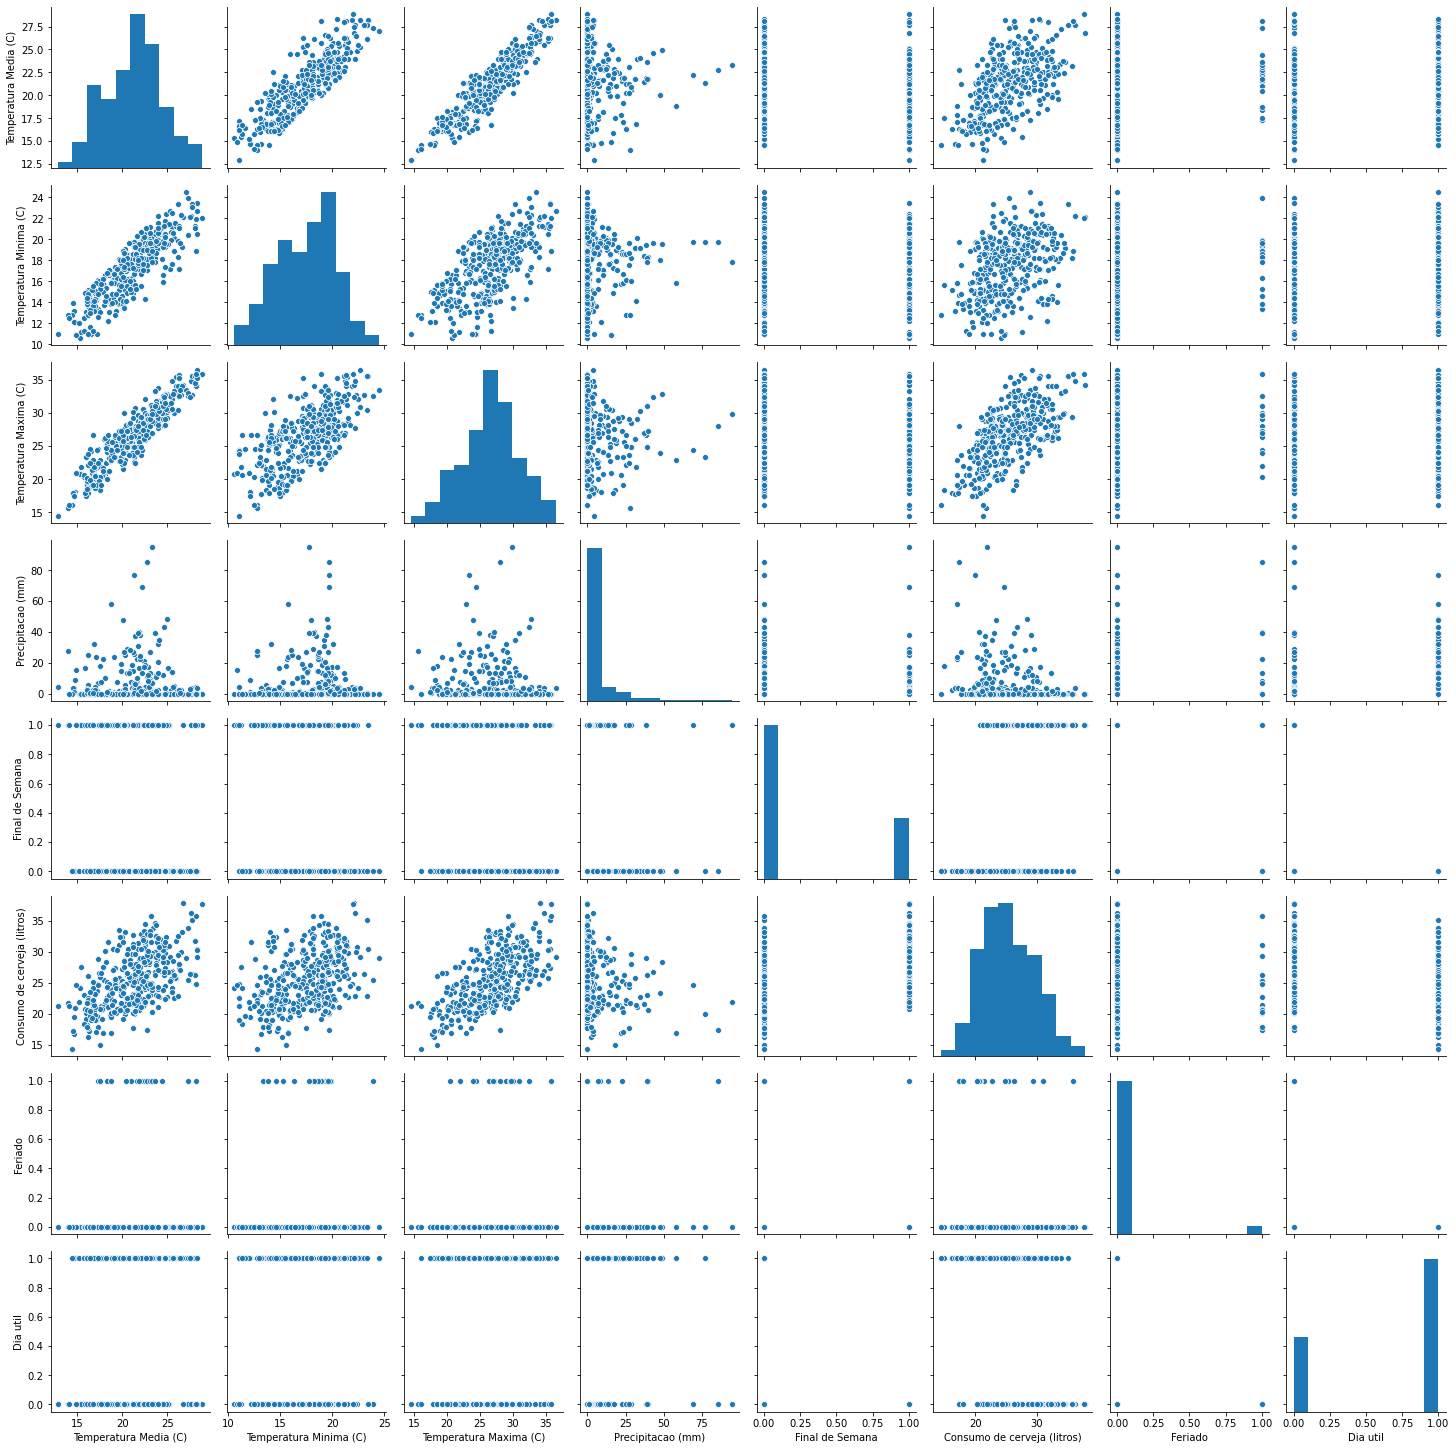

In [ ]:
# Média movel de 7 dias
df['mm7']= df['Consumo de cerveja (litros)'].rolling(7).mean()

# Média movel de 30 dias
df['mm30']= df['Consumo de cerveja (litros)'].rolling(30).mean()
df.tail()

In [ ]:
plt.figure(figsize = (16,5))
columns = ['mm7', 'mm30']
graph = df[columns].plot(figsize=(15, 4), grid=True)

Featured engenering

Plotar media movel - OK

Install Stats model - OK

Seasonal decompose - OK

Procurar uma API de Previsão do tempo - OK

Transformar o indice em datetime - OK

df.index as freq

Procurar autoarima

Fazer o traning test split

In [31]:
nresult = seasonal_decompose(df['Consumo de cerveja (litros)'], model='additive')
nresult.plot();

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None